In [1]:
# Create a set of K-neighbors classifiers 
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
bagging = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)

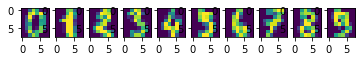

In [3]:
# Using digits dataset
from sklearn.datasets import load_digits
digits = load_digits()

# Display of 10 first images
import matplotlib.pyplot as plt
fig = plt.figure()
for i, digit in enumerate(digits.images[:10]):
    fig.add_subplot(1,10,i+1)
    plt.imshow(digit)
plt.show()

In [4]:
import numpy as np
from sklearn import tree
from sklearn.ensemble import BaggingClassifier

X, y = digits.data, digits.target
clf = tree.DecisionTreeClassifier()
clf.fit(X, y)
accuracy = clf.score(X,y)
print(accuracy)

1.0


In [5]:
# Now splitting the dataset:

from sklearn.model_selection import train_test_split
# 90% for test and 10% for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)

clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

Z = clf.predict(X_test)
accuracy = clf.score(X_test,y_test)
print(accuracy)

0.6724351050679852


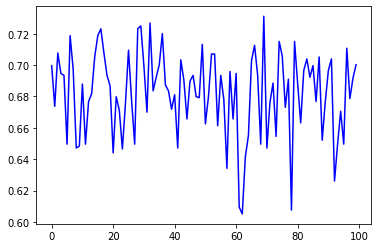

In [11]:
# Calculate variance of accuracy for different splits for 100 independant decision trees:

accuracy_list = list()
accuracy_index = [i for i in range(0, 100)]
for i in accuracy_index:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)

    clf = tree.DecisionTreeClassifier()
    clf.fit(X_train, y_train)

    Z = clf.predict(X_test)
    accuracy_list.append( clf.score(X_test,y_test) )
    
plt.figure()
plt.plot(accuracy_index, accuracy_list, 'b')

In [14]:
# Now for comparing we will build a bag classifier
clf = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5, max_features=0.5, n_estimators=100)

In [15]:
# Training the bagging classifier:
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
accuracy=clf.score(X_test,y_test)

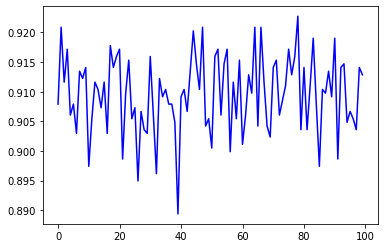

In [16]:
accuracy_list = list()
accuracy_index = [i for i in range(0, 100)]
for i in accuracy_index:
    clf = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5, max_features=0.5, n_estimators=100)
    clf.fit(X_train, y_train)
    accuracy=clf.score(X_test,y_test)
    accuracy_list.append( clf.score(X_test,y_test) )
    
plt.figure()
plt.plot(accuracy_index, accuracy_list, 'b')

In [19]:
# Let's dislay the accuracy vs estimator number
accuracy_list = list()
accuracy_training_list = list()
accuracy_index = [i for i in range(10, 301, 5)]
for i in accuracy_index:
    clf = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5, max_features=0.5, n_estimators=i)
    clf.fit(X_train, y_train)
    accuracy_training_list.append(clf.score(X_train, y_train))    
    accuracy_list.append( clf.score(X_test,y_test) )    

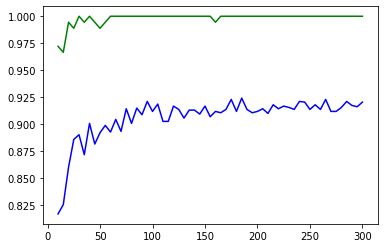

In [21]:
plt.figure()
plt.plot(accuracy_index, accuracy_list, 'b')
plt.plot(accuracy_index, accuracy_training_list, 'g')

In [22]:
# Now we are going to use a grid search to find the best values for  max_samples and max_feat
tuned_parameters = {'max_samples':[0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8],
                    'max_features':   [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]}

In [27]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(BaggingClassifier(tree.DecisionTreeClassifier(), n_estimators=50), tuned_parameters, cv=5)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)
clf.fit(X_train, y_train)

/home/jeslava/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                                               criterion='gini',
                                                                               max_depth=None,
                                                                               max_features=None,
                                                                               max_leaf_nodes=None,
                                                                               min_impurity_decrease=0.0,
                                                                               min_impurity_split=None,
                                                                               min_samples_leaf=1,
                                                                               min_samples_split=2,
                                                   

In [32]:
print(clf.best_params_)
print(clf.best_score_)

{'max_features': 0.2, 'max_samples': 0.6}
0.8994413407821229


<IPython.core.display.Javascript object>


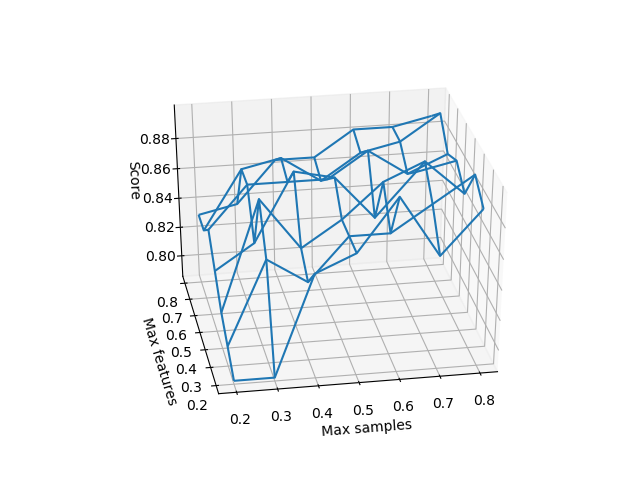

In [34]:
%matplotlib notebook
# Display results of grid search
# Plot results vs combinations of hyperparams
n_max_samples = np.array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8])
n_max_features = np.array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8])
# the coordinnates of the figure are the value of hyper params
xx, yy = np.meshgrid(n_max_samples, n_max_features)
Z = clf.cv_results_['mean_test_score'].reshape(xx.shape)

# plot of results as a wireframe
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlabel("Max samples")
ax.set_ylabel("Max features")
ax.set_zlabel("Score")
ax.plot_wireframe(xx, yy, Z)

In [35]:
clf_best = clf.best_estimator_
clf_best.score(X_test, y_test)

0.8813349814585909

In [36]:
# Random forest
digits = load_digits()
X, y = digits.data, digits.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)


In [37]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=200)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [38]:
y_pred = clf.predict(X_test)
accuracy = clf.score(X_test,y_test)
print(accuracy)

0.9369592088998764


<IPython.core.display.Javascript object>


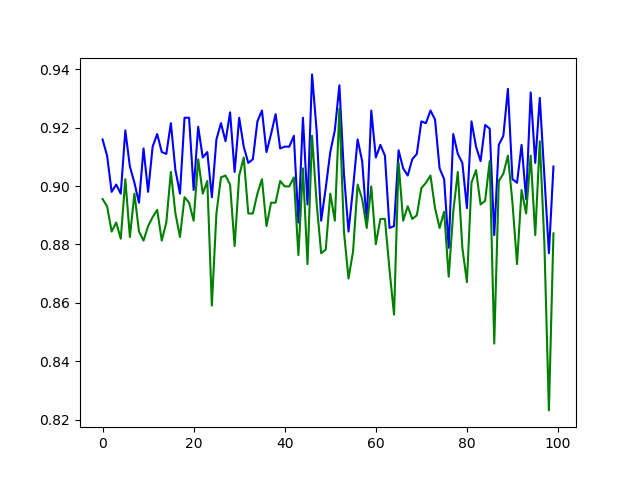

In [40]:
accuracy_list = list()
accuracy_b_list = list()
accuracy_index = [i for i in range(0, 100)]
for i in accuracy_index:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)
    clf = RandomForestClassifier(n_estimators=200)
    clf.fit(X_train, y_train) 
    accuracy_list.append( clf.score(X_test,y_test) )
    clf_b = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5, max_features=0.5, n_estimators=200)
    clf_b.fit(X_train, y_train)    
    accuracy_b_list.append( clf_b.score(X_test,y_test) )
    
plt.figure()
plt.plot(accuracy_index, accuracy_list, 'b')
plt.plot(accuracy_index, accuracy_b_list, 'g')

<IPython.core.display.Javascript object>


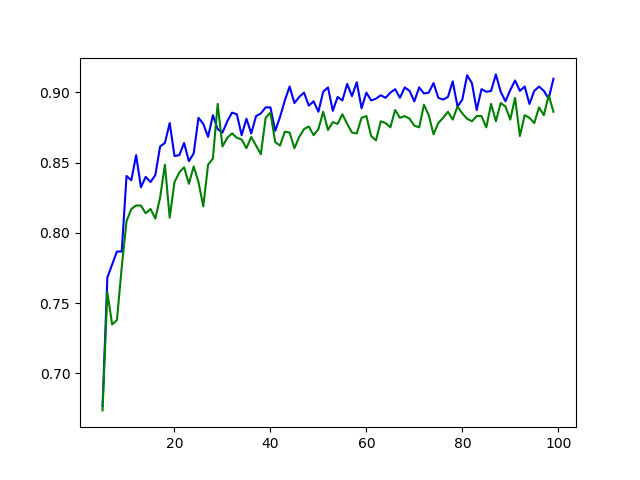

In [43]:
accuracy_list = list()
accuracy_b_list = list()
accuracy_index = [i for i in range(5, 100)]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)
for i in accuracy_index:    
    clf = RandomForestClassifier(n_estimators=i)
    clf.fit(X_train, y_train) 
    accuracy_list.append( clf.score(X_test,y_test) )
    clf_b = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5, max_features=0.5, n_estimators=i)
    clf_b.fit(X_train, y_train)    
    accuracy_b_list.append( clf_b.score(X_test,y_test) )

plt.figure()
plt.plot(accuracy_index, accuracy_list, 'b')
plt.plot(accuracy_index, accuracy_b_list, 'g')

In [44]:
# Boosting
from sklearn.ensemble import AdaBoostClassifier

digits = load_digits()
X, y = digits.data, digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)

# AdaBoost based on 200 trees
clf = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=5), n_estimators=200, learning_rate=2)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.8918417799752781


In [48]:
# Using grid search to find  max_depth and learning rate
tuned_parameters = {'max_depth':[3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                    'learning_rate':   [2, 3]}

In [53]:
# Let's see the influence of max_depth value
accuracy_list = list()
max_depth_vals = [i for i in range(5, 13)]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)
for max_depth_val in max_depth_vals:  
    clf = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=max_depth_val), n_estimators=200, learning_rate=2)
    clf.fit(X_train, y_train)
    accuracy_list.append(clf.score(X_test, y_test))

<IPython.core.display.Javascript object>


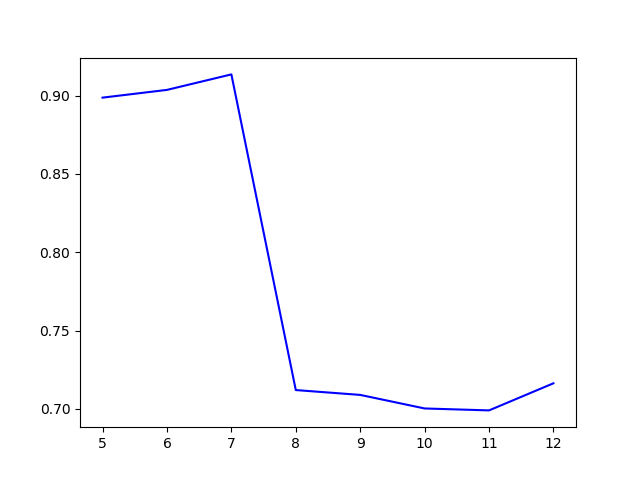

In [54]:
plt.figure()
plt.plot(max_depth_vals, accuracy_list, 'b')

In [57]:
# Now the influence of learning rate
accuracy_list = list()
learning_rate_vals = np.arange(0.5, 8, 0.5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)
for learning_rate_val in learning_rate_vals:  
    clf = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=7), n_estimators=200, learning_rate=learning_rate_val)
    clf.fit(X_train, y_train)
    accuracy_list.append(clf.score(X_test, y_test))

<IPython.core.display.Javascript object>


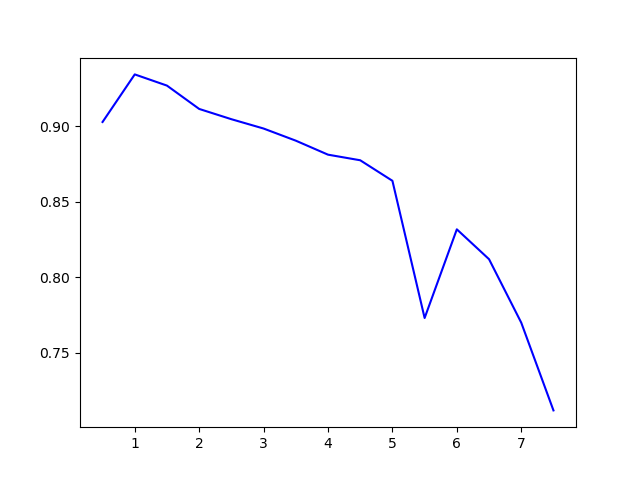

In [59]:
plt.figure()
plt.plot(learning_rate_vals, accuracy_list, 'b')